In [2]:
import json, argparse, os
from turtle import width
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
from matplotlib.widgets import Slider, TextBox
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib.animation as animation
from matplotlib import markers, rcParams
import numpy as np
import seaborn as sns
plt.style.use("./tplot.mplstyle")

In [3]:
N=20
t2=20
t3=50
ab=10.5
a=10.5
b=1
dt=0.05
tf=1000
times= np.arange(0, 1*(tf+dt), dt)

In [4]:
it = np.loadtxt("step_strain_phase/{:d}/sheartimes.txt".format(N), delimiter=',') #times at which the shear was applied
it=np.int32(it)
it = int(5000/dt)+2 - it #steady state sims were tf=5000
# the simulation was run for tf/dt iterations after perturbation was applied.
# basically Sols[i][it[i]:,:] will give sols just after step strain. This data was not taken wisely.

preSols =[]
postSols=[]
phases  =[]
for i in np.arange(1,196,1):
    preSols.append(np.fromfile("step_strain_phase/{:d}/{:1.1f}/{:1.1f}/{:1.1f}/solution{:1.0f}.dat".format(N, ab, t2, t3, i)))
    preSols[-1]=preSols[-1].reshape(len(preSols[-1])//(3*N+1), 3*N+1)
    preSols[-1]=preSols[-1][:,:N+1] - np.arange(N+1)[np.newaxis,:]    #this is now the displacement field
    postSols.append(preSols[-1][it[i-1]:,:])    #all sols post strain
    preSols[-1]=preSols[-1][:it[i-1],:]         #last frame is application of strain
postSols = np.asarray(postSols)

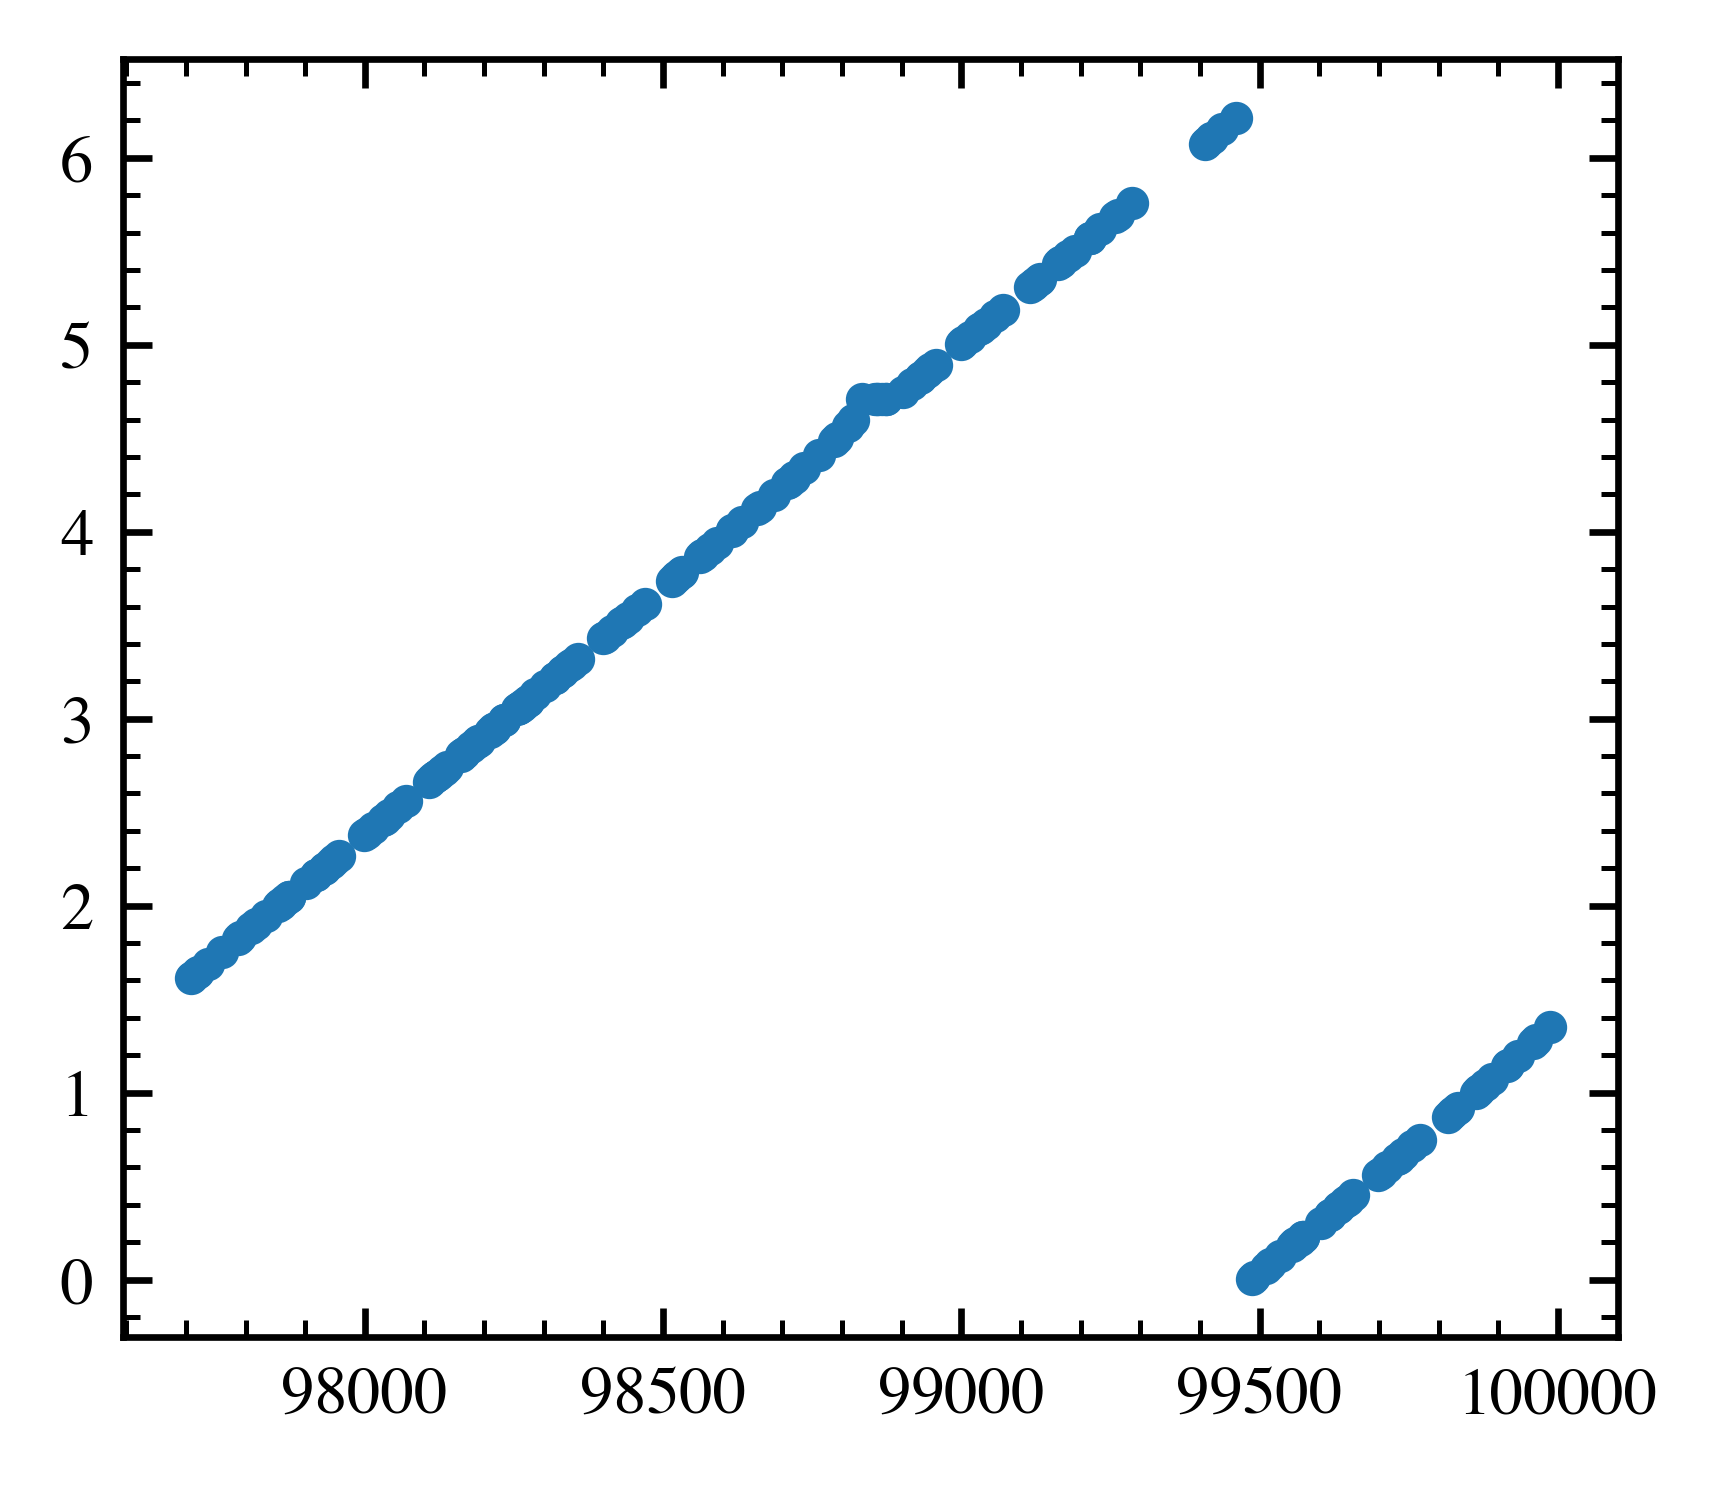

In [5]:
n=10    #phase of which cell?
phases = np.zeros((195))
for i in np.arange(0,195,1):
    #cos = (preSols[i][-1,10]-preSols[i][-2,10])/(dt*0.65) #0.65 is the frequency
    #sin = preSols[i][-1,10]/np.max(preSols[i][-10000:,10])
    #phases[i] += np.arctan2(sin, cos)
    theta = np.arcsin(preSols[i][-1,n]/np.max(np.abs(preSols[i][-10000:,n])))
    Delta = preSols[i][-1,n]-preSols[i][-2,n]
    theta=np.where(np.sign(Delta) == np.sign(theta), theta, np.sign(theta)*(np.pi-np.abs(theta))) #angle in -pi/2 to pi/2
    phases[i]+= np.where(theta<0, np.pi-theta, theta) #angle in 0 to pi
plt.scatter(it,phases)
plt.show()

Text(0.5, 1.0, 'Kymograph of Passive Strain')

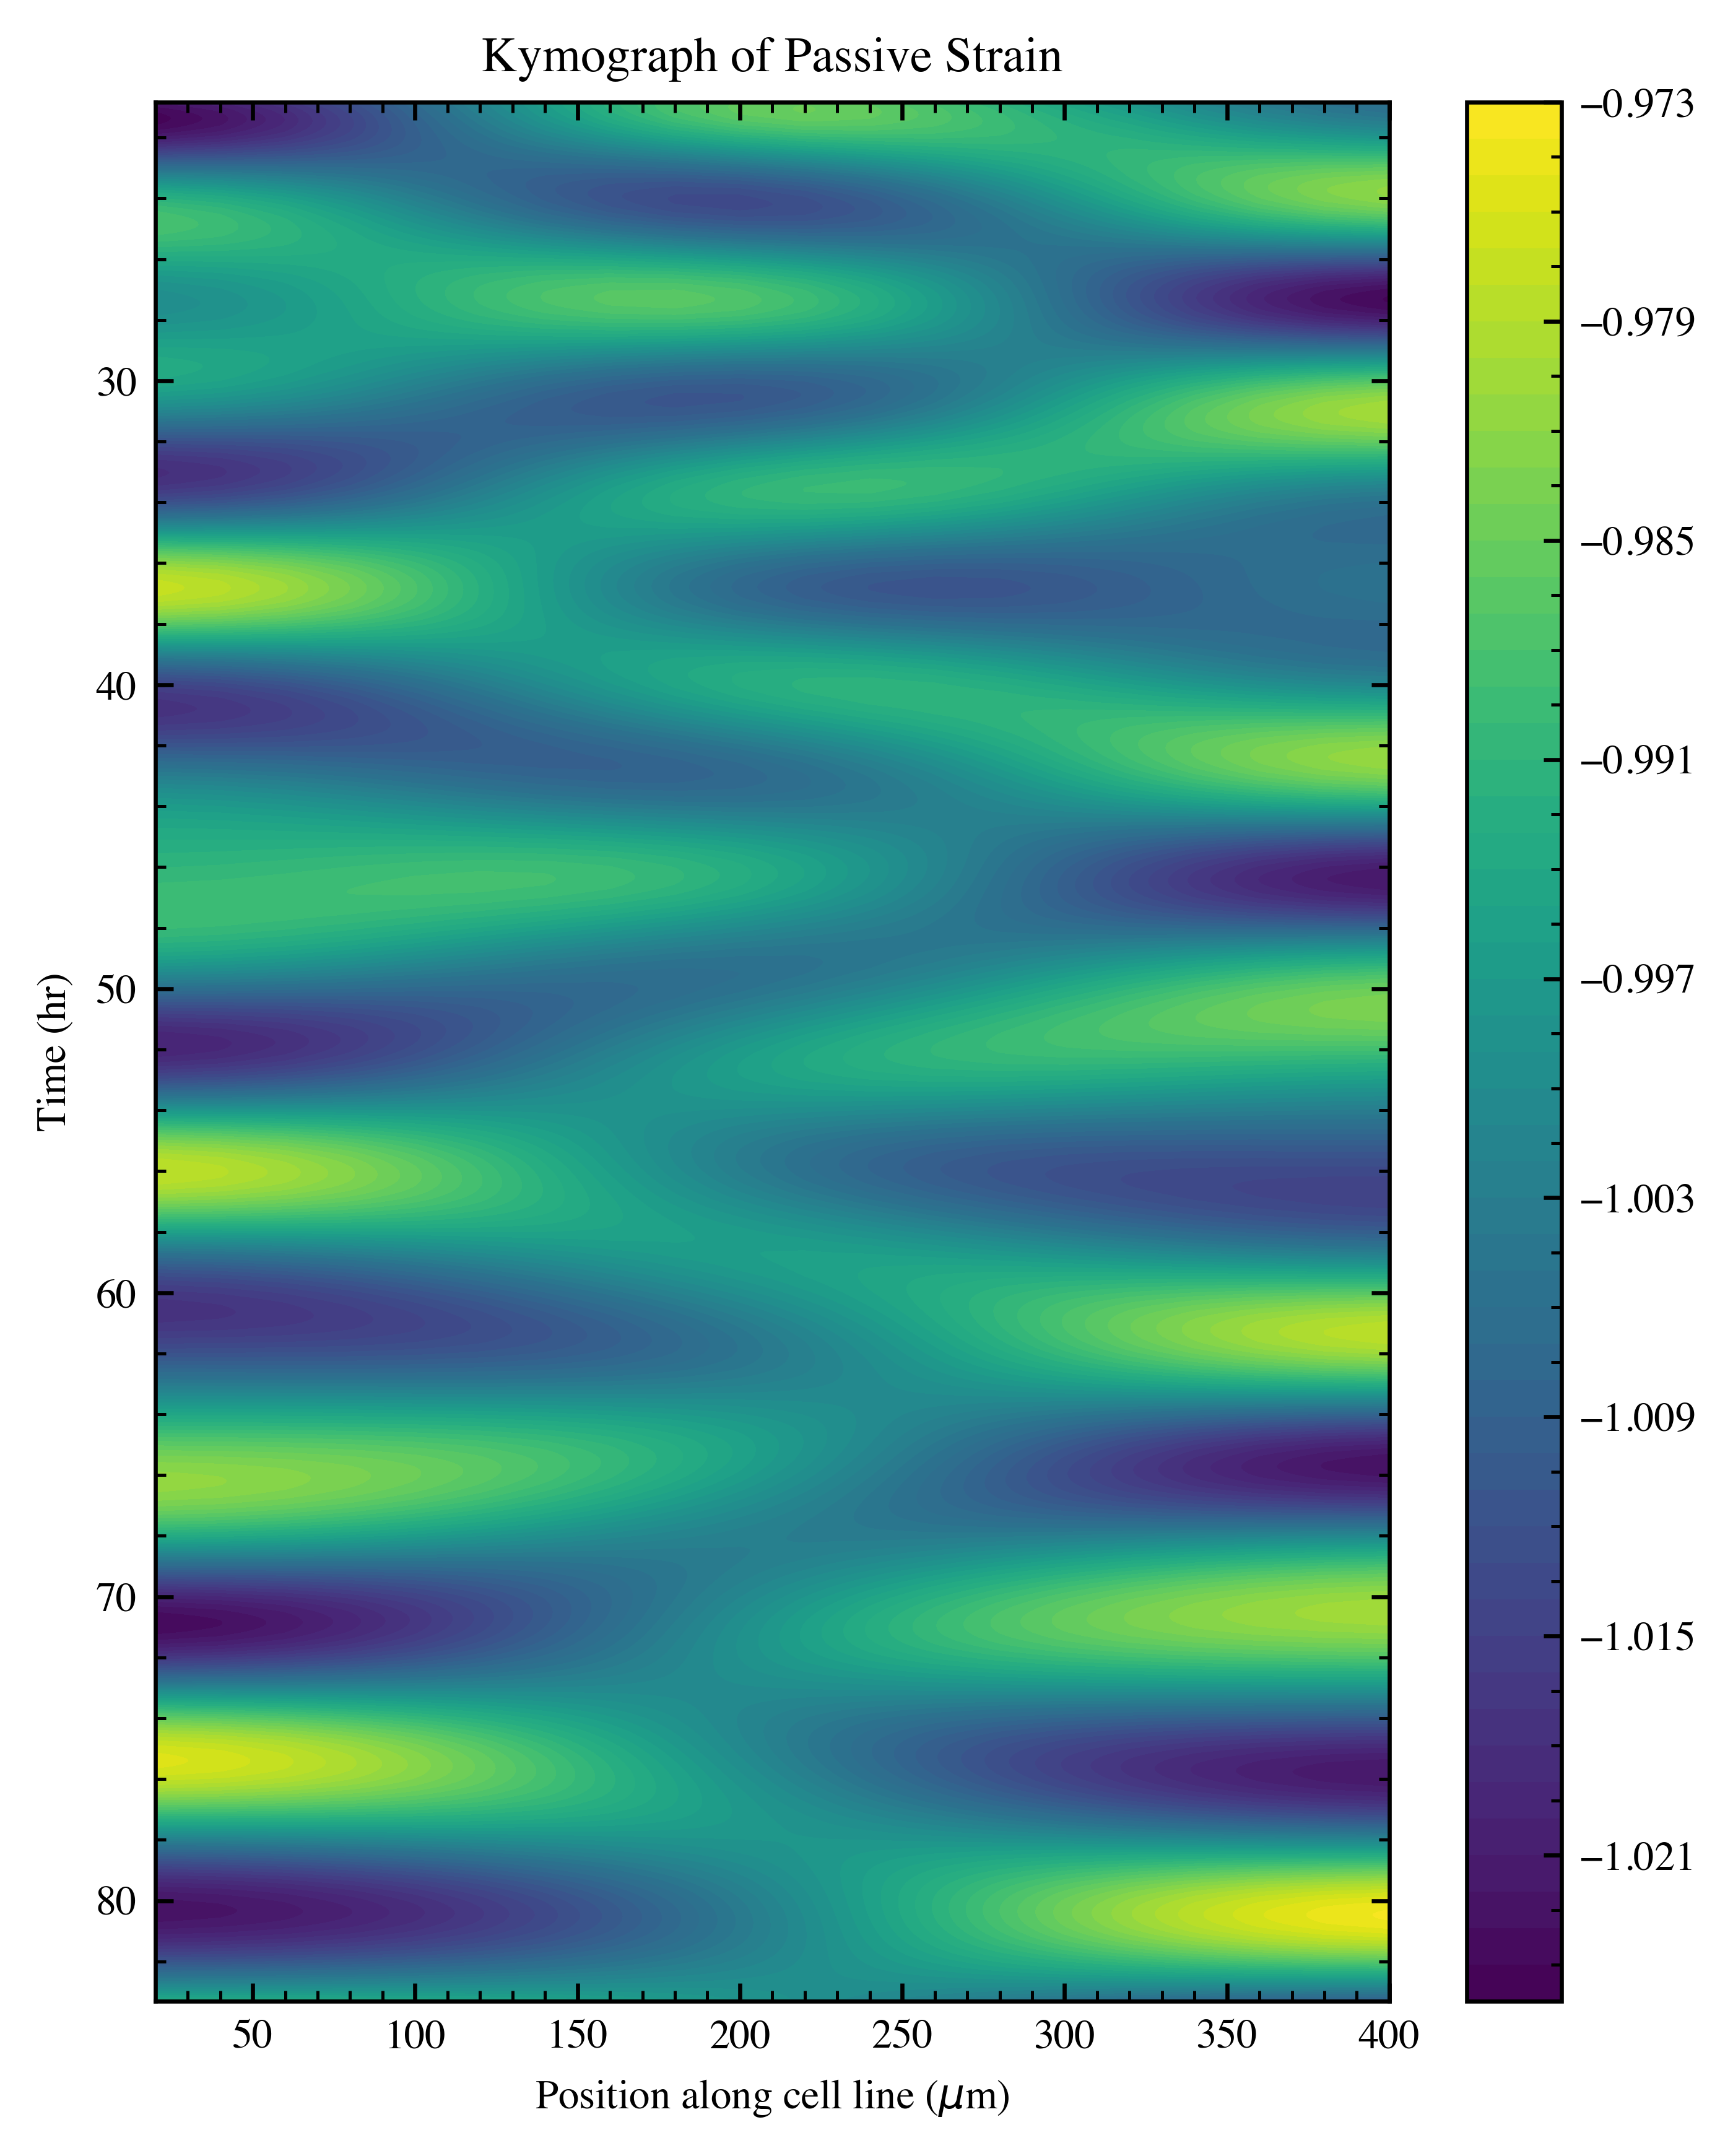

In [112]:
igl, axl = plt.subplots(1, figsize=(5.5,6))
k = np.int32(1000/200); tstop = int(1000/dt)#int(592/dt) #int(tf/dt)
tstart=int(250/dt)
#this is passive strain
plt.contourf(np.arange(1,(N+1), )*20, times[tstart:tstop:k]*5/60, (preSols[0][tstart:tstop-1:k,1:N+1]-preSols[0][tstart:tstop-1:k,:N]-1),50)
#this is active strain
#plt.contourf(l*np.arange(1*l,(N+1)*l, l)*20, times[1:tstop:k]*t1*5/60, (1-Sol[0:tstop:k,N+1:-N]),50)
plt.colorbar()
axl.invert_yaxis()
#s = np.reshape(Sol[0:-1:k,1:N+1]-Sol[0:-1:k,:N], (45, N))
#axl.imshow(s, interpolation='bilinear')
axl.set_xlabel(r'Position along cell line ($\mu$m)')
#axl.set_ylabel(r'Time (t/$\tau_r$)')
axl.set_ylabel(r'Time (hr)')
axl.set_title('Kymograph of Passive Strain')

Text(0.5, 1.0, 'Kymograph of Passive Strain')

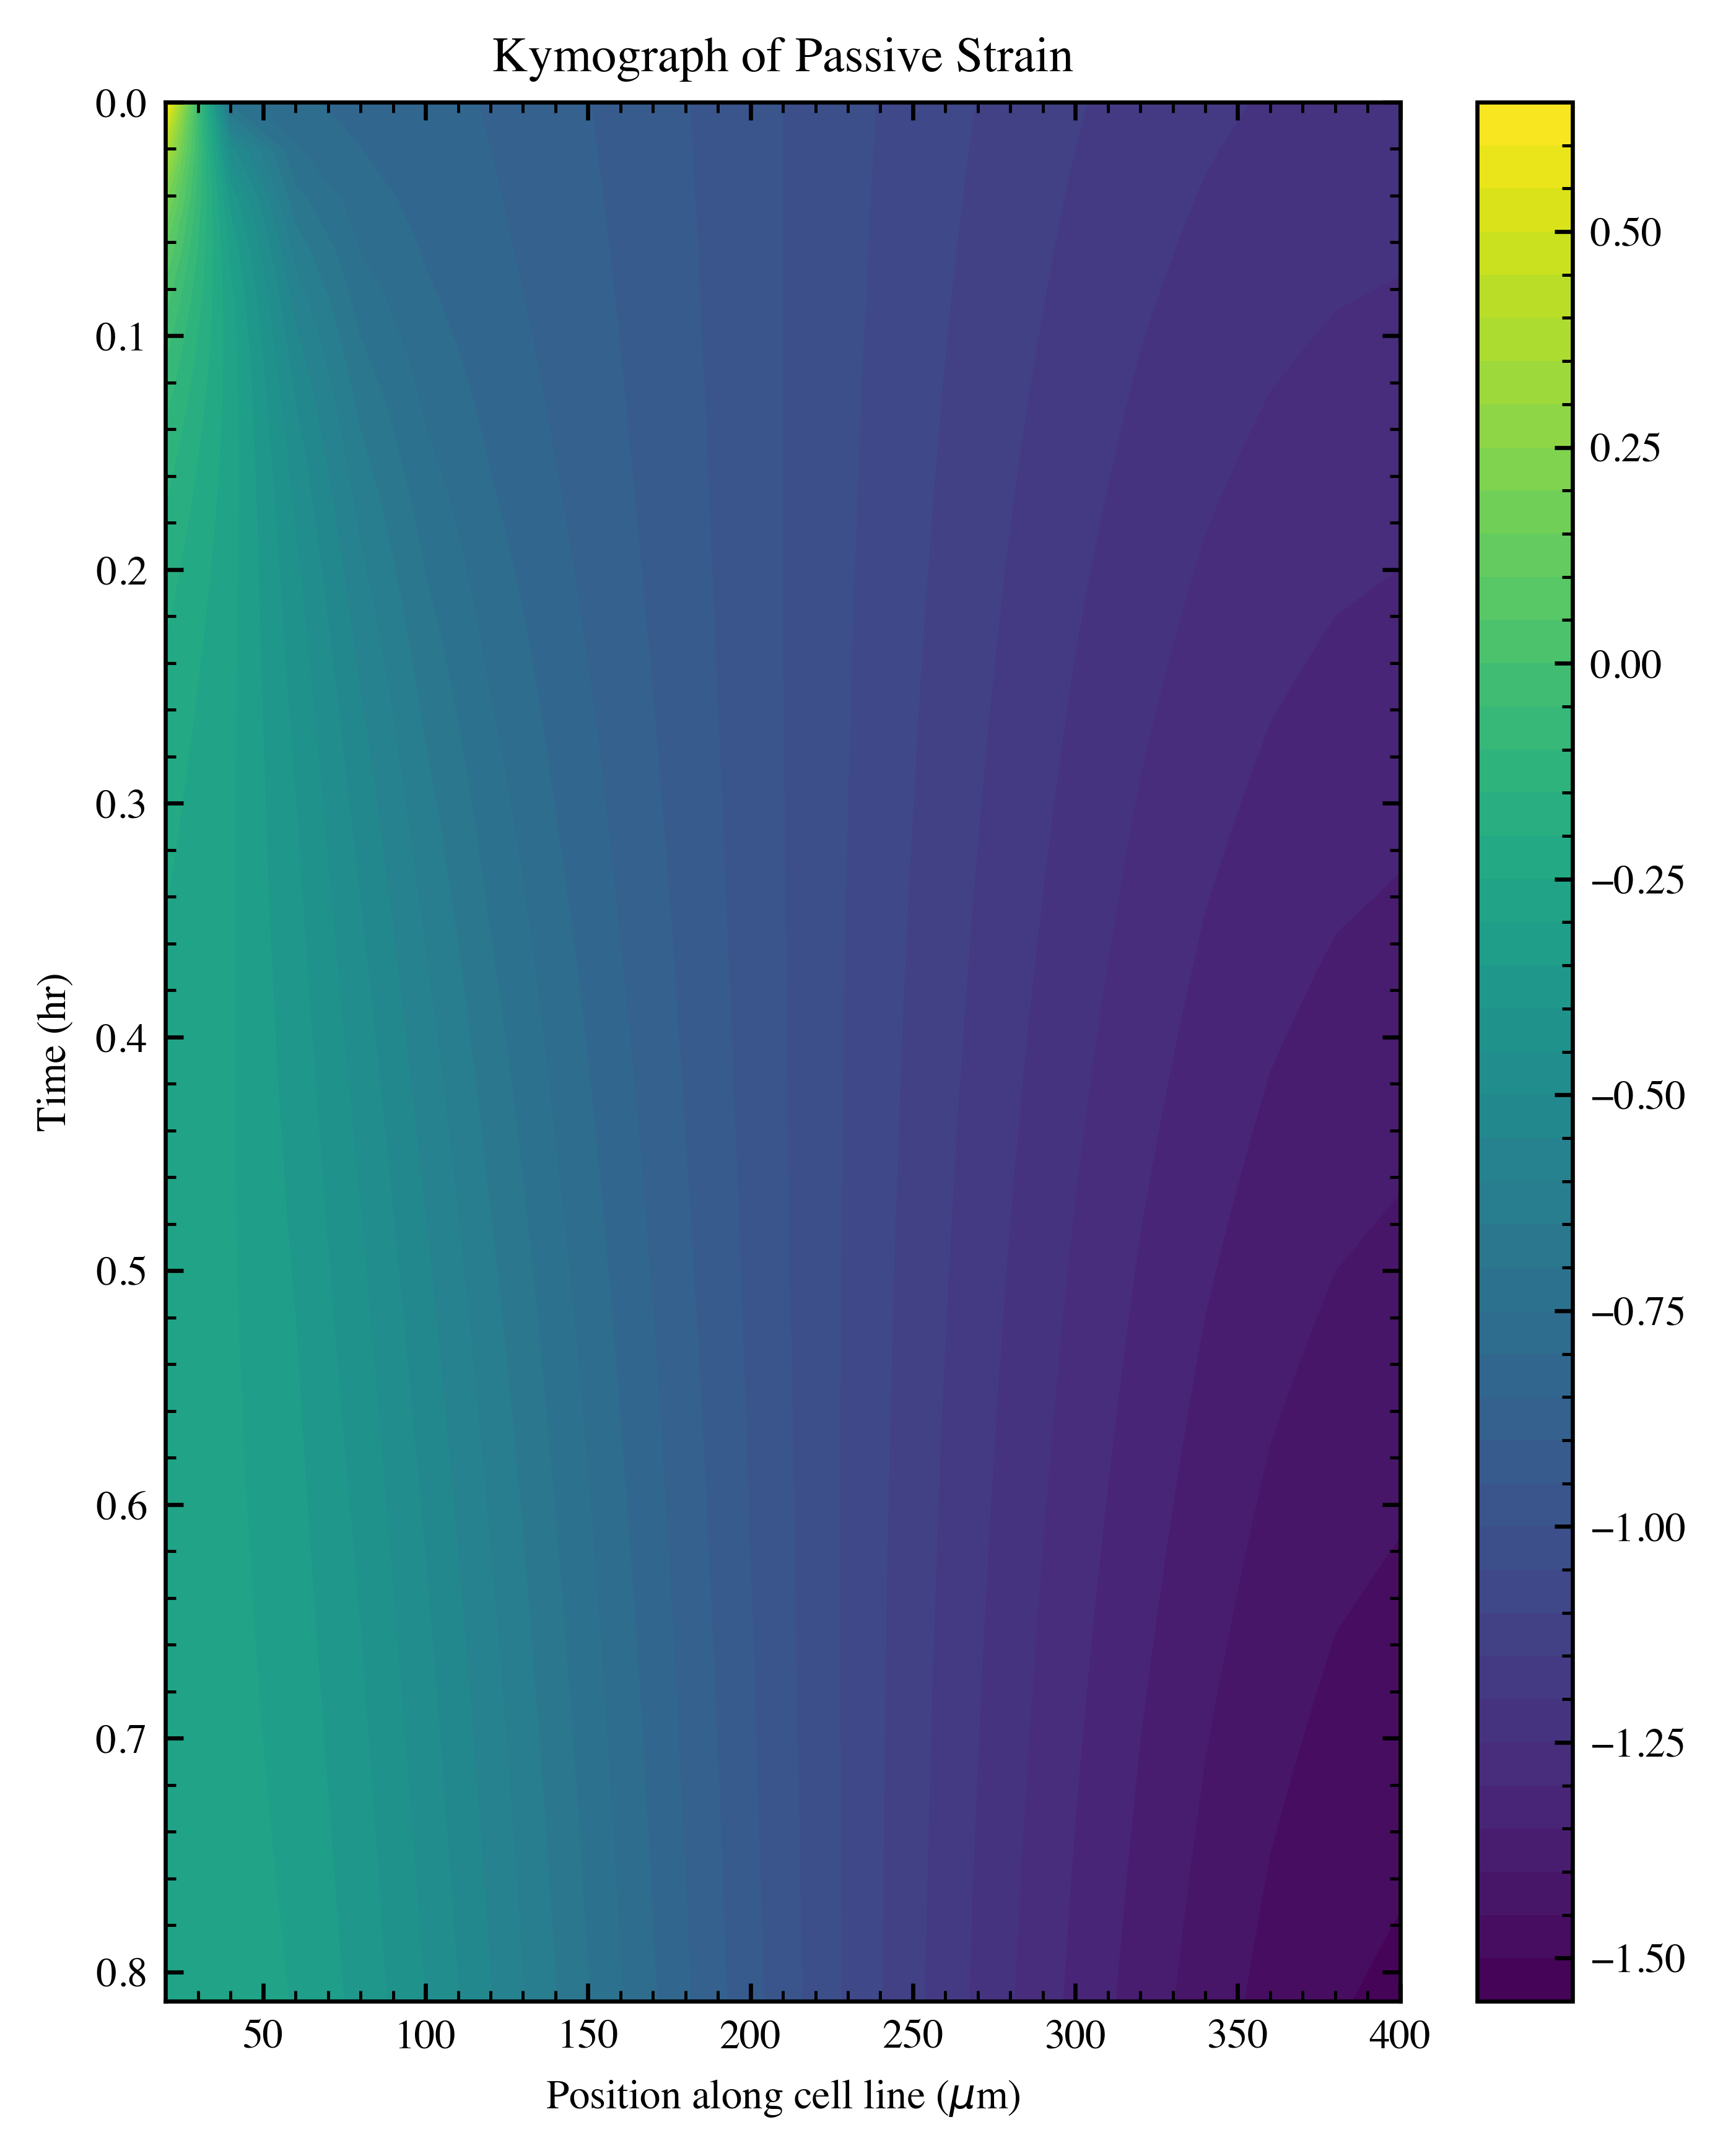

In [127]:

igl, axl = plt.subplots(1, figsize=(5.5,6))
k = np.int32(10/2); tstop = int(10/dt)#int(592/dt) #int(tf/dt)
tstart=int(0/dt)
#this is passive strain
plt.contourf(np.arange(1,(N+1), )*20, times[tstart:tstop:k]*5/60, (postSols[0][tstart:tstop-1:k,1:N+1]-postSols[0][tstart:tstop-1:k,:N]-1),50)
#this is active strain
#plt.contourf(l*np.arange(1*l,(N+1)*l, l)*20, times[1:tstop:k]*t1*5/60, (1-Sol[0:tstop:k,N+1:-N]),50)
plt.colorbar()
axl.invert_yaxis()
#s = np.reshape(Sol[0:-1:k,1:N+1]-Sol[0:-1:k,:N], (45, N))
#axl.imshow(s, interpolation='bilinear')
axl.set_xlabel(r'Position along cell line ($\mu$m)')
#axl.set_ylabel(r'Time (t/$\tau_r$)')
axl.set_ylabel(r'Time (hr)')
axl.set_title('Kymograph of Passive Strain')

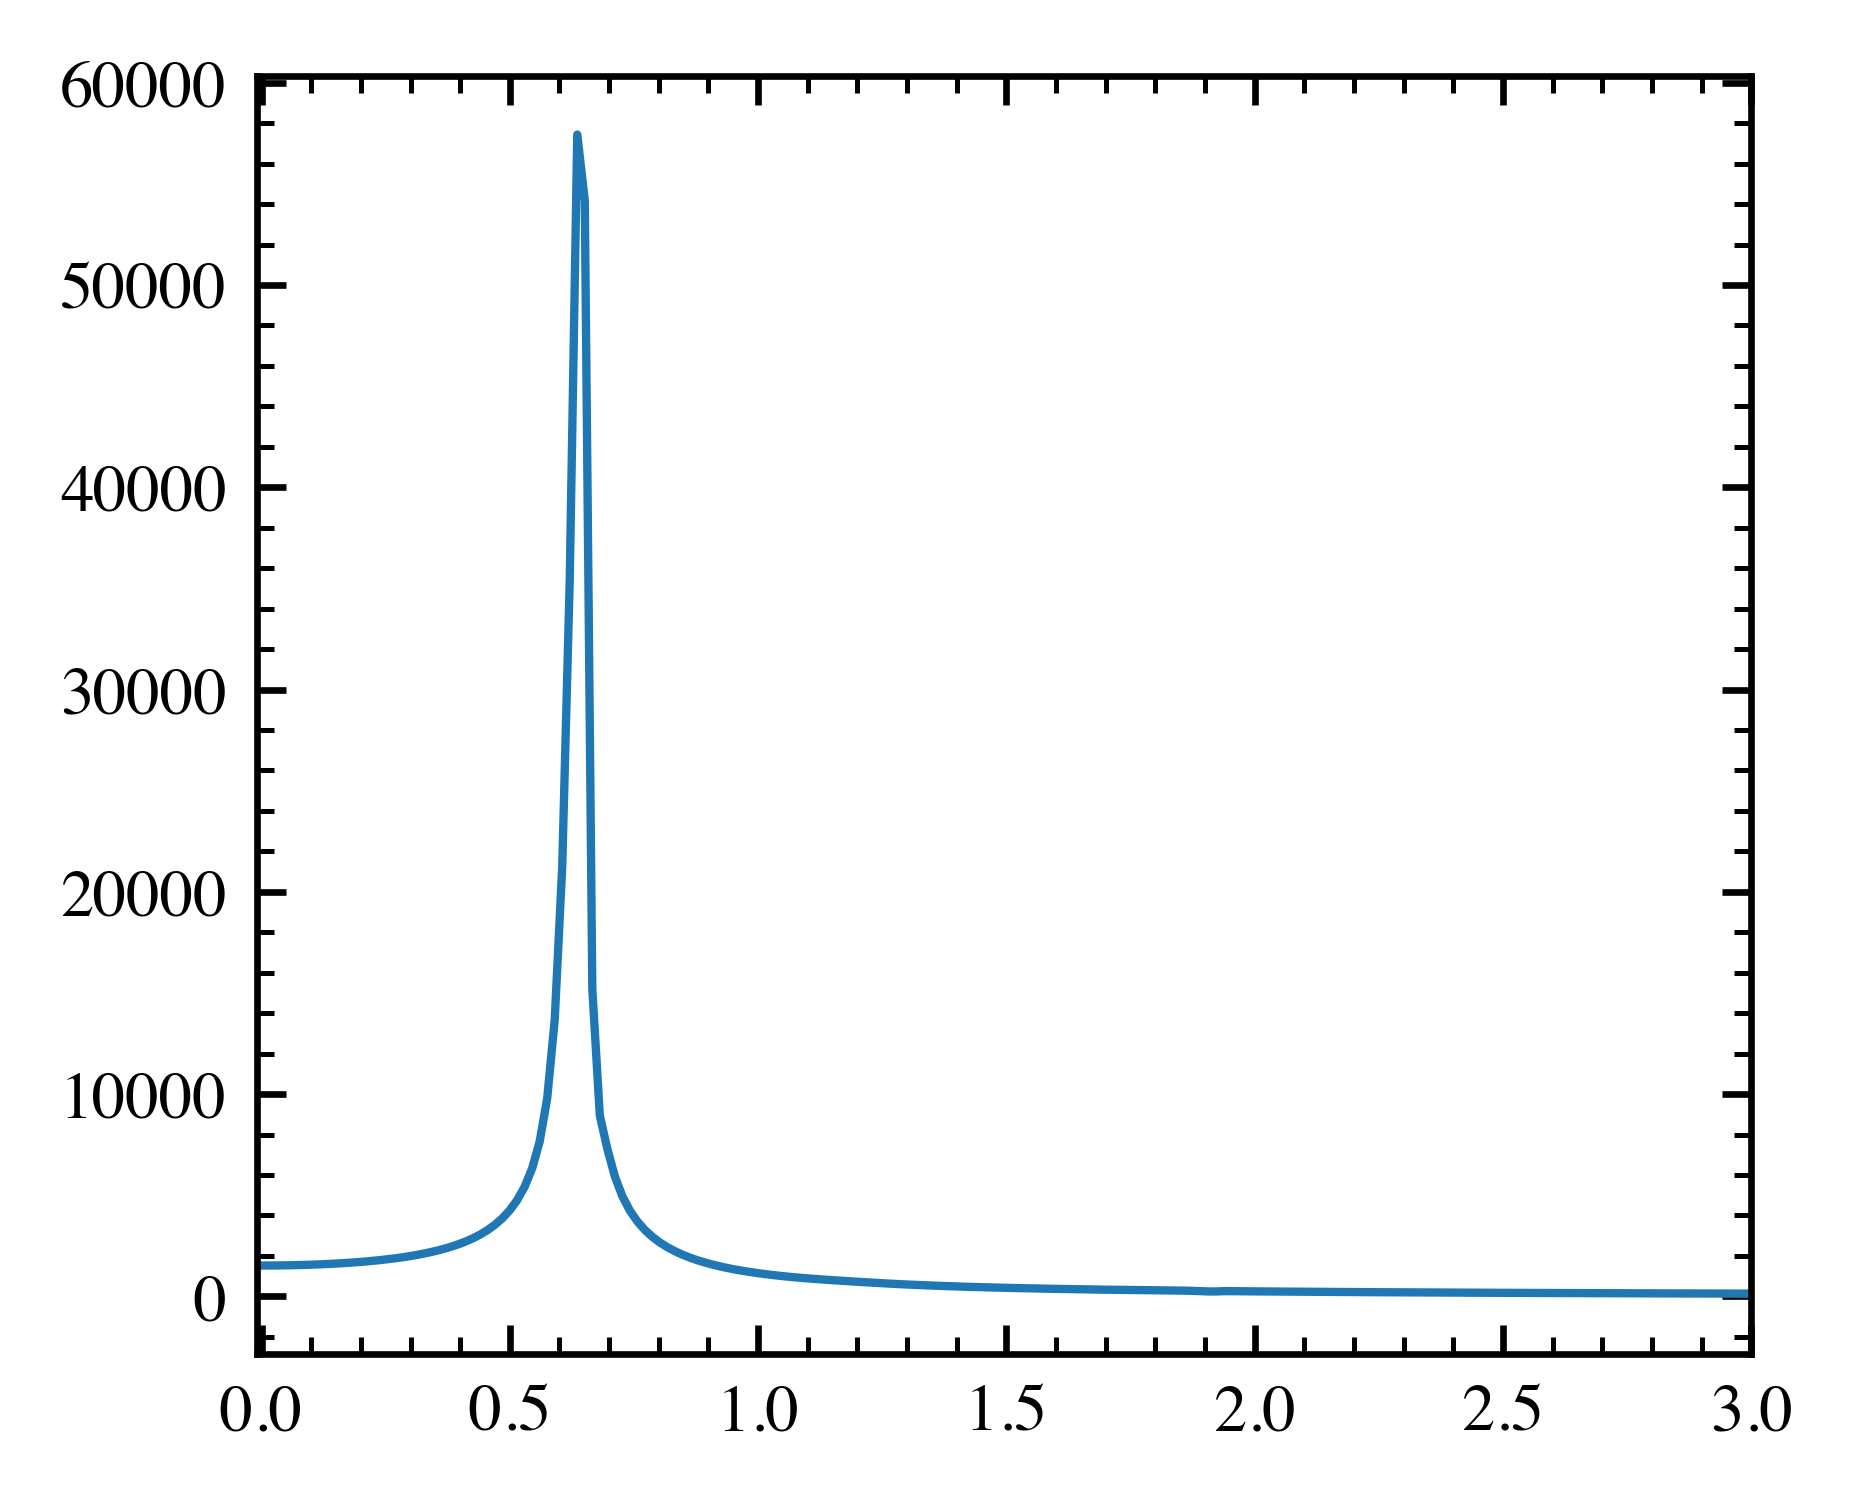

In [12]:
fftpreSols = np.fft.rfft(preSols[0], axis=0)
freqs       = np.fft.rfftfreq(len(preSols[0][:,0]), dt)
mags        = np.abs(fftpreSols)
peak        = np.argmax(mags, axis=0)
fftdpreSols= np.copy(fftpreSols)
fftdpreSols[8,:]=0
dpostSols   = np.fft.irfft(fftdpreSols, axis=1)
#plt.plot(np.arange(0,N+1,1), dpostSols[0,0:200:10,:].T)
#plt.show()
plt.plot(freqs*24*np.pi, (mags[:,10]).T)
plt.xlim(-0.01,3)
plt.show()

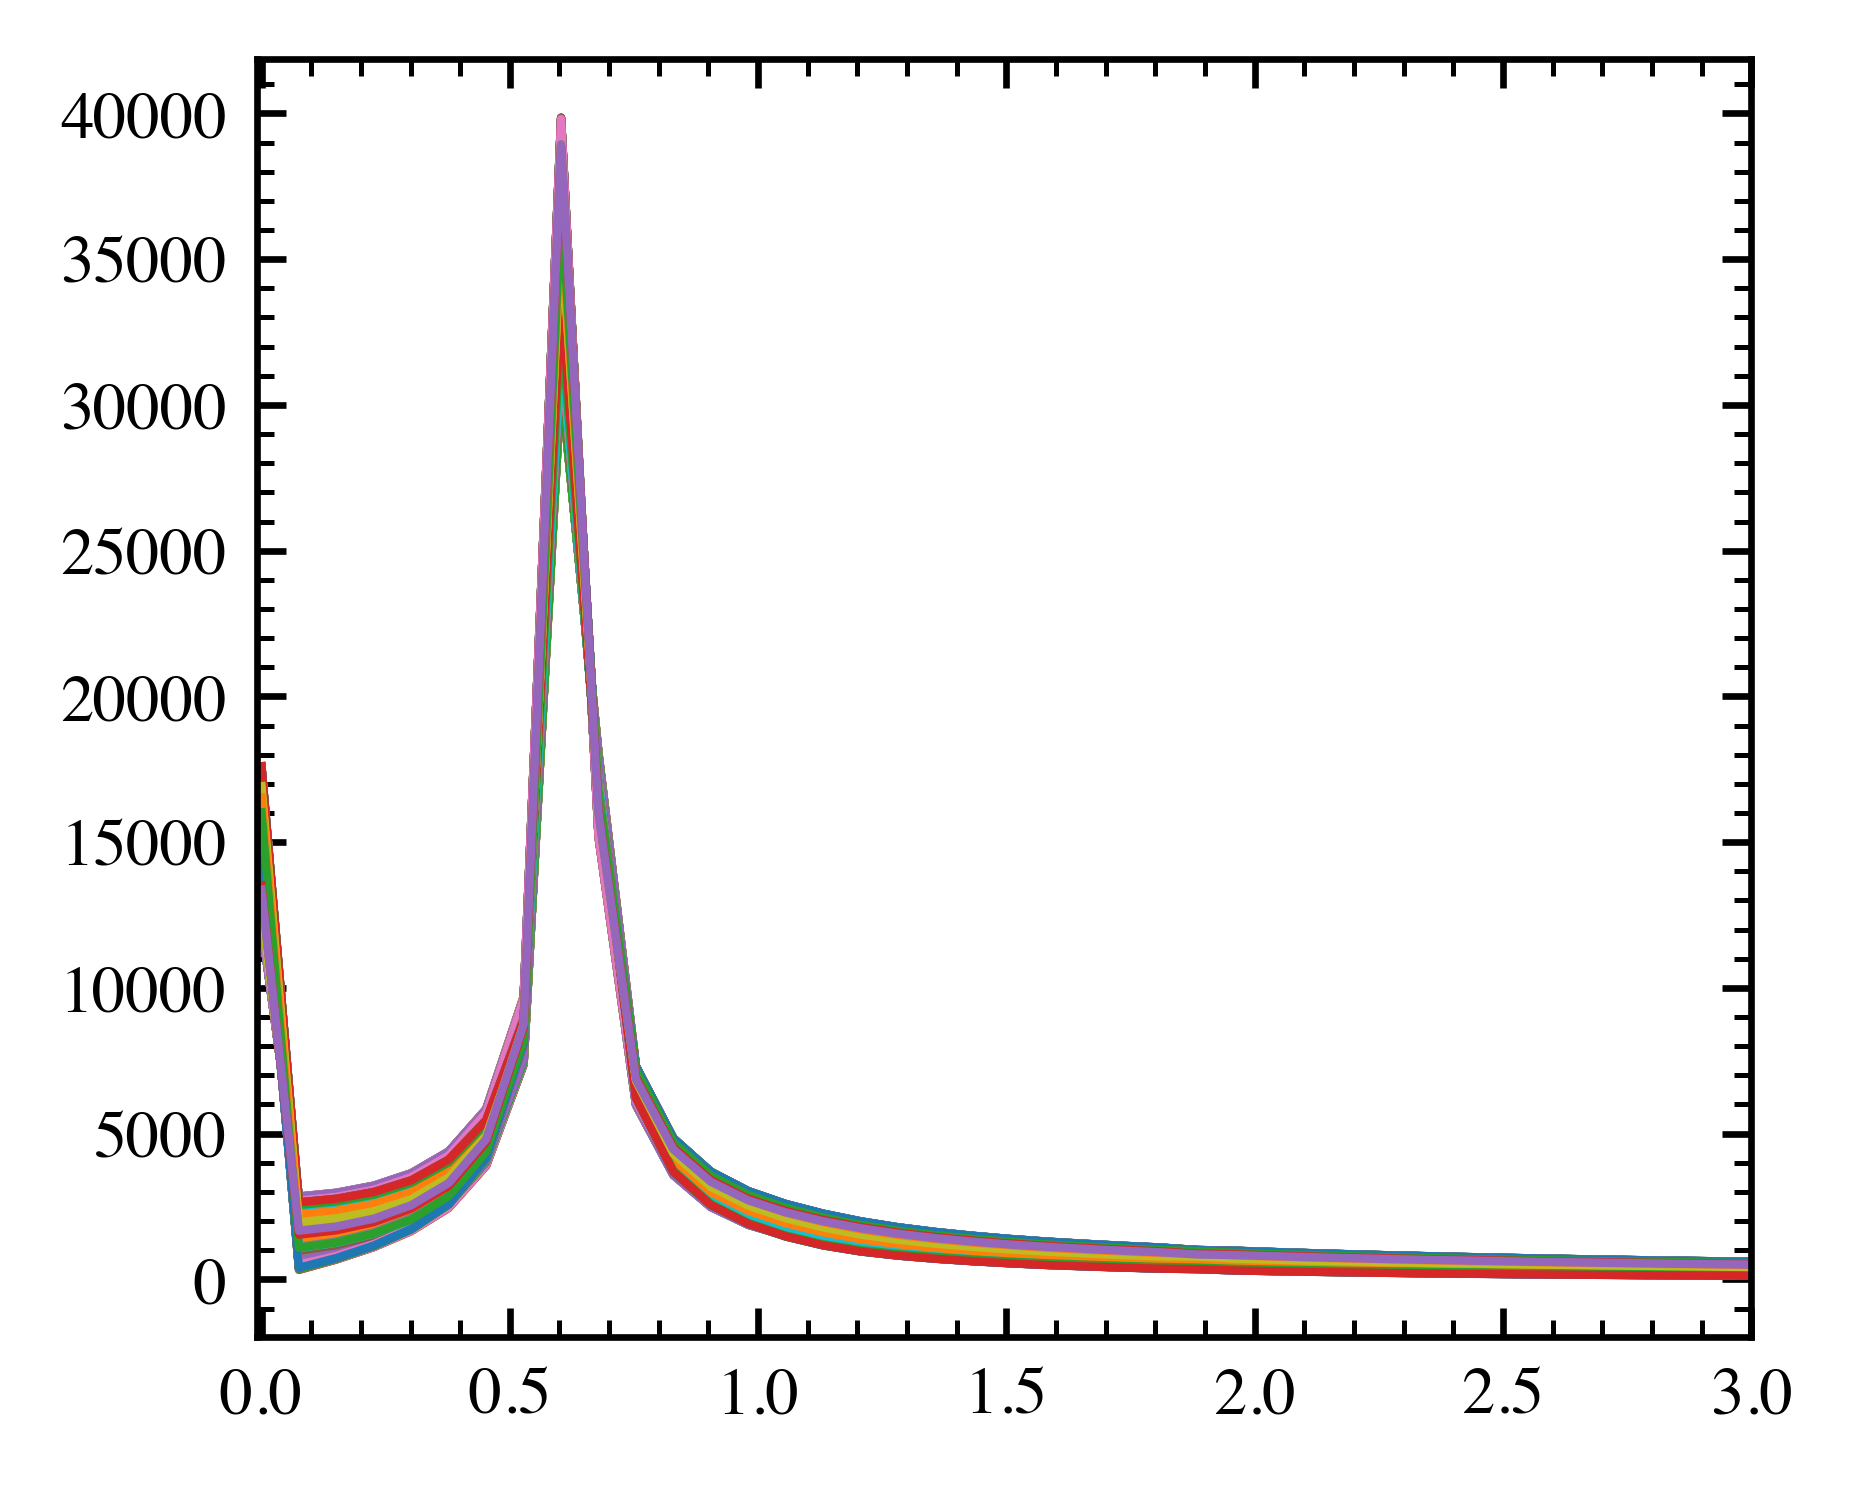

In [9]:
fftpostSols = np.fft.rfft(postSols, axis=1)
freqs       = np.fft.rfftfreq(len(postSols[0,:,0]), dt)
mags        = np.abs(fftpostSols)
peak        = np.argmax(mags, axis=1)
fftdpostSols= np.copy(fftpostSols)
fftdpostSols[:,8,:]=0
dpostSols   = np.fft.irfft(fftdpostSols, axis=1)
#plt.plot(np.arange(0,N+1,1), dpostSols[0,0:200:10,:].T)
#plt.show()
plt.plot(freqs*24*np.pi, (mags[:,:,10]).T)
plt.xlim(-0.01,3)
plt.show()

(195, 20000)


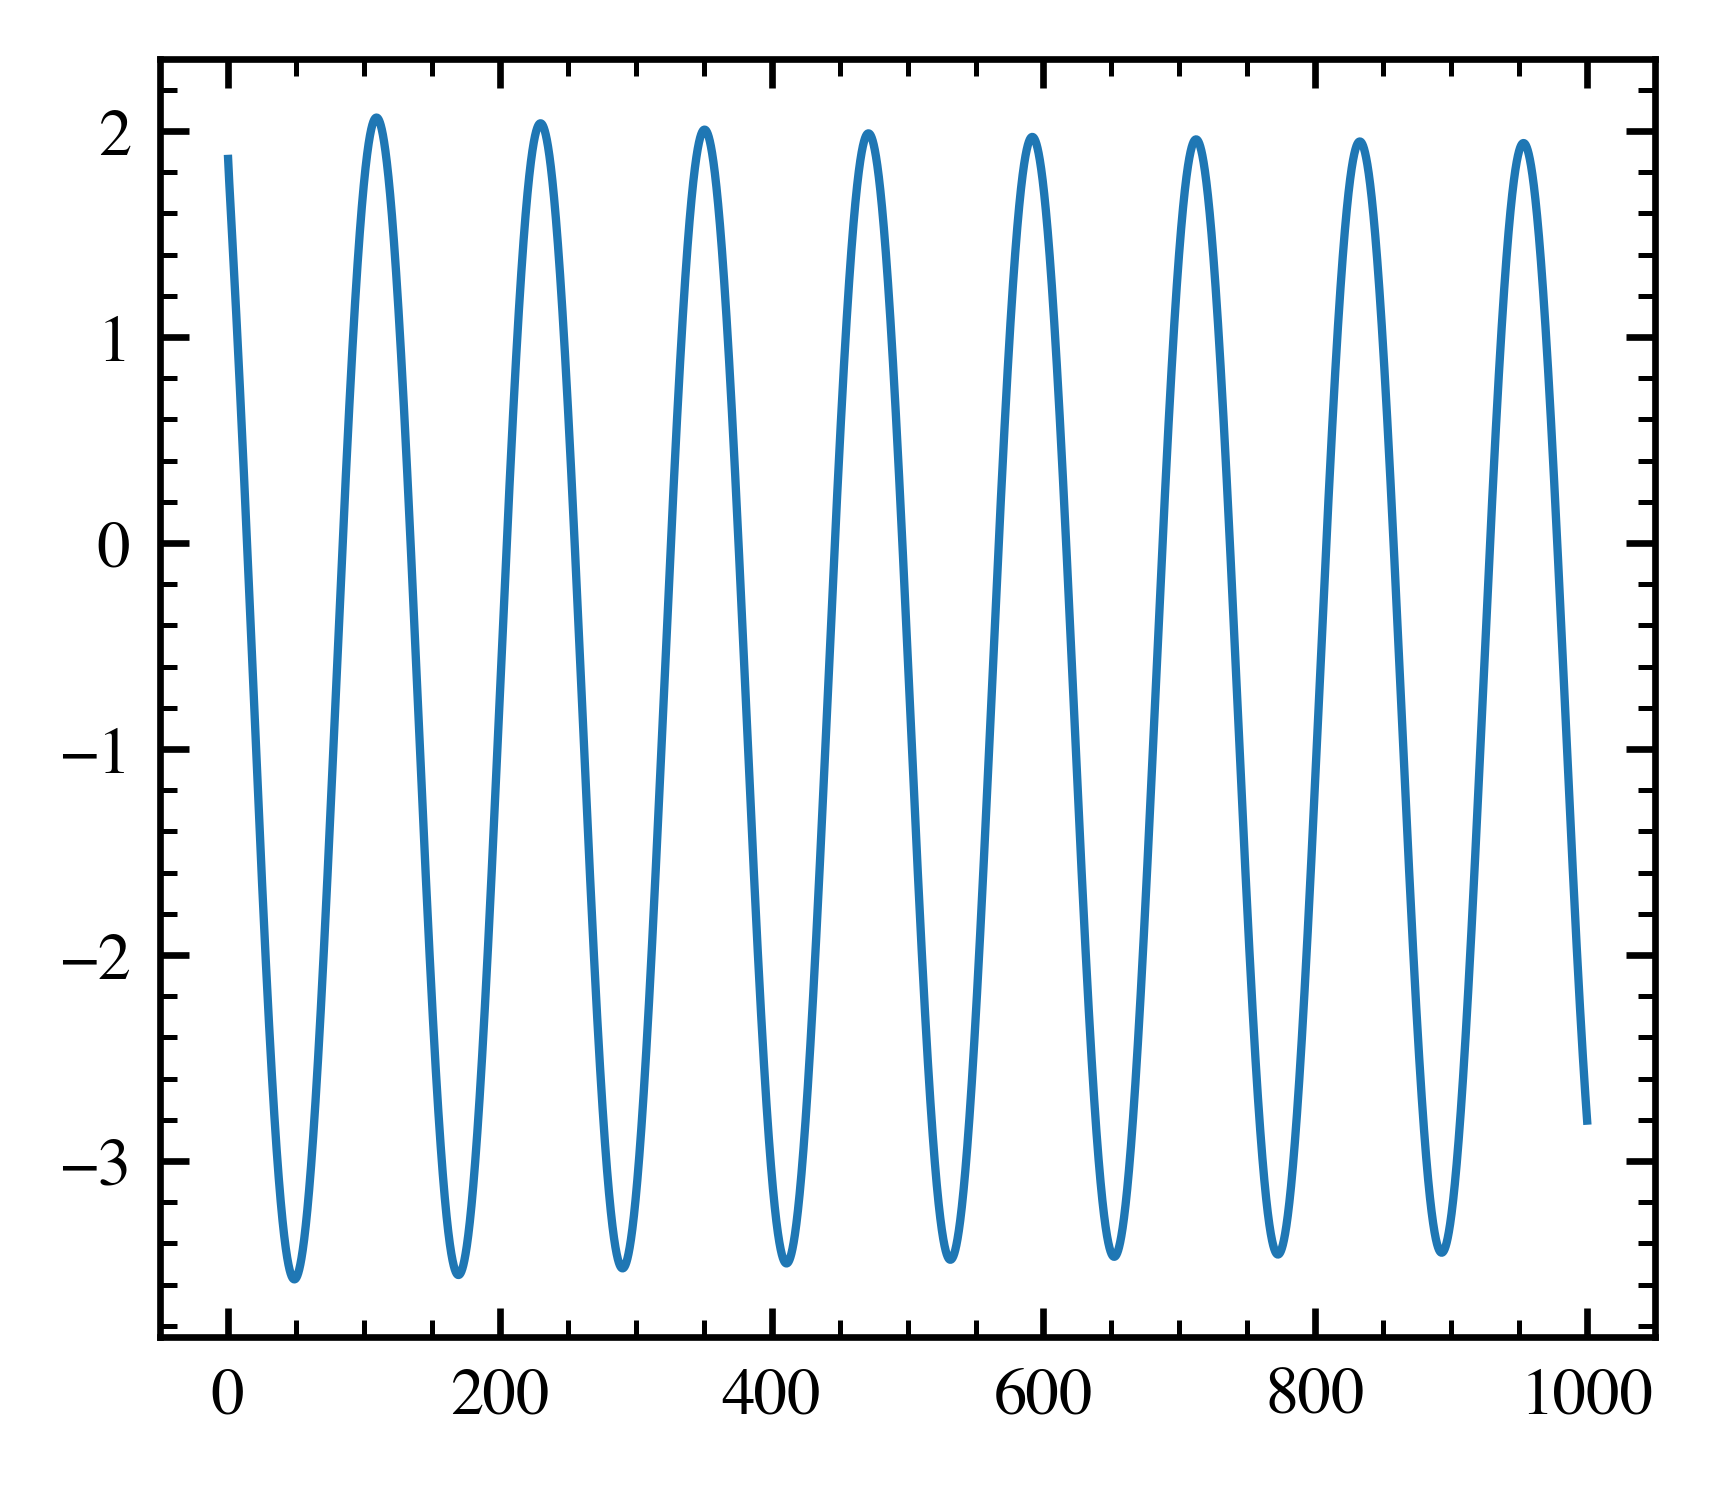

In [24]:
ucom = np.mean(postSols, axis=2)
#plt.scatter(phases, ucom[:,0])
print(np.shape(ucom))
plt.plot(times[1:], ucom[-20].T)

In [151]:
#v-v correlation functions for first 200 data points
#velocity correlation functions for the first thousand time points, say
ftime = 1000
postvels = (postSols[:,1:1+ftime,:]-postSols[:,:ftime,:])/dt
poststrains = postSols[:,:ftime,1:]-postSols[:,:ftime,:N]
postvcorr=np.zeros((195,ftime, N+1))
for twindow in np.arange(0,ftime,1):
    for xwindow in np.arange(0,N+1,1):
        postvcorr[:,twindow, xwindow] += np.mean(np.mean((postvels[:,twindow:,xwindow:]*postvels[:,:ftime-twindow,:N+1-xwindow]), axis=1),axis=1)
#plt.imshow(postvcorr[0], origin='lower')
#plt.colorbar()

/var/folders/ch/hvt754js3b919ry3lnvfz0_c0000gn/T/ipykernel_15750/527150367.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.arange(len(postvcorr[0,1:,0])), 0.02/np.arange(len(postvcorr[0,1:,0]))*np.arange(len(postvcorr[0,1:,0])))
/var/folders/ch/hvt754js3b919ry3lnvfz0_c0000gn/T/ipykernel_15750/527150367.py:2: RuntimeWarning: invalid value encountered in multiply
  plt.plot(np.arange(len(postvcorr[0,1:,0])), 0.02/np.arange(len(postvcorr[0,1:,0]))*np.arange(len(postvcorr[0,1:,0])))


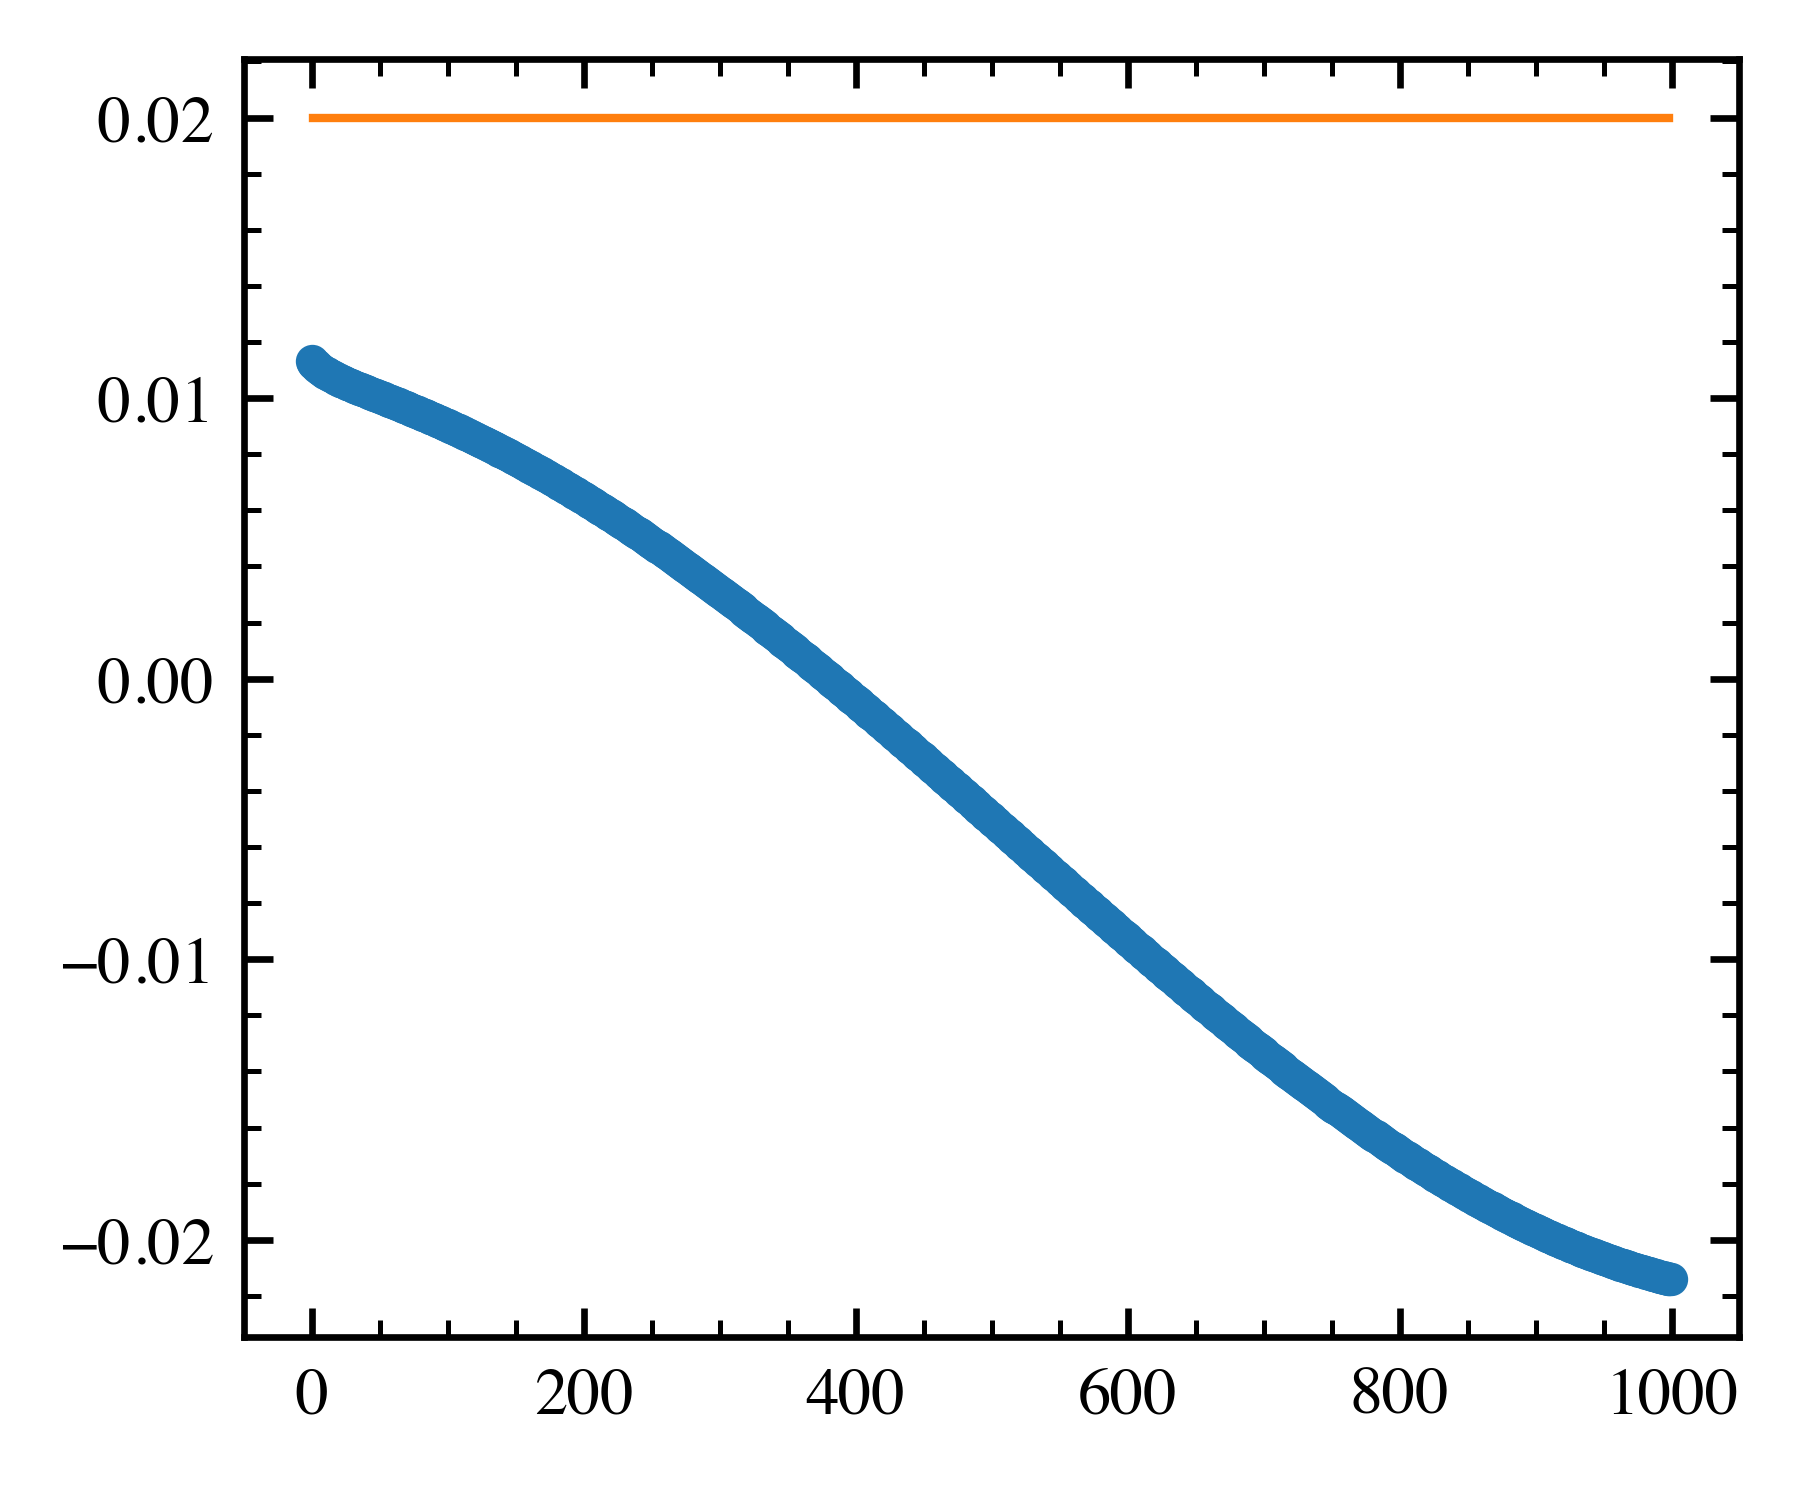

In [165]:
plt.plot(np.arange(len(postvcorr[0,:,0])), postvcorr[0,:,0], marker='o')
plt.plot(np.arange(len(postvcorr[0,1:,0])), 0.02/np.arange(len(postvcorr[0,1:,0]))*np.arange(len(postvcorr[0,1:,0])))